<a href="https://colab.research.google.com/github/JosegSuarezb/aprendizaje-no-supervisado/blob/main/Reto3_Jose_Gregorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una empresa busca segmentar su base de clientes utilizando un enfoque simplificado, centrándose en variables clave que capturan las características demográficas, de comportamiento de compra, y de interacción digital de los clientes. Este enfoque permitirá identificar segmentos que reflejen diferentes necesidades y comportamientos de los clientes, lo que facilitará la personalización de productos y estrategias de marketing. fuente de datos
La empresa está interesada en características como la edad, número de hijos, total de gasto de productos, total de promociones, Ingresos, número de visitas en páginas web y nivel educativo.
Para esta problemática se debe realizar los siguientes pasos:
1.	 Entendimiento de los datos: ¿los datos tienen registros faltantes? Elimínelos si los tiene.
2.	Seleccionar y crear las variables de interés para la empresa.
3.	Realice un análisis descriptivo de las variables, incluya gráficos y mencione una descripción general sobre los datos.
4.	Realice una transformación de variables categóricas a dummy y estandarizar las variables (con las variables de interés de la empresa) para aplicar los métodos de segmentación.
5.	Aplique K-means y Clúster jerárquico, determine el número de clústeres con los métodos propuestos en el curso (método del codo, puntaje de silueta y dendograma para el caso de clúster jerárquico). Justifique cual es el número de clústeres para k-means y Clúster jerárquico.
6.	Para K-means y Clúster jerárquico, con el número de clústeres definido en cada uno. Realice gráficos, resúmenes estadísticos para cada clúster. De una descripción de cada clúster tanto para los clústeres en K-means como en Clúster jerárquico. Para crear la descripción debe incluir gráficos que involucren todas las variables de interés para la empresa.
7.	De una conclusión general sobre cuál algoritmo (k-means o Clúster jerárquico) es mejor para este tipo de problemática y mencione algún tipo de propuesta para un solo clúster del algoritmo seleccionado.


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Conexión con mi unidad en Google Drive

Mounted at /content/drive


In [ ]:
import pandas as pd # Manejo de Data Frame
import numpy as np # Manejo matricial
import warnings # Omitir warnings
warnings.filterwarnings("ignore") # Ignorar warning (me estresan los warnings >:|)
# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Librerías para clustering
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
# Score de silueta
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler

In [ ]:
datos= pd.read_csv("/content/drive/MyDrive/aprendizaje no supervisado/marketing_campaign.csv",sep= "\t")
datos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
datos.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Eliminamos los datos faltantes en la variable ingresos (Income) que es la variable que tiene datos faltantes

In [ ]:
datos=datos.dropna(subset=["Income"])

In [ ]:
datos.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Como se puede observar se eliminaron los datos faltantes de la variable ingresos quedando la base de datos sin datos faltantes

In [ ]:
datos = datos.copy()
datos.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**SELECCIONAR Y CREAR LAS VARIABLES DE INTERES PARA LA EMPRESA**

In [ ]:
datos['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [ ]:
#EDAD
datos['Age'] = 2024 - datos['Year_Birth']

In [ ]:
#NÚMERO DE HIJOS
datos['TotalChilds'] = datos[['Kidhome','Teenhome']].sum(axis=1)

In [ ]:
#TOTAL DE PROMOCIONES
datos['Totalcamp']  = datos[[ 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response']].sum(axis=1) #Suma todas las columnas

In [ ]:
#TOTAL DE GASTO DE PRODUCTOS
datos['TotalAmount'] = datos[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:
datos.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'TotalChilds', 'Totalcamp', 'TotalAmount'],
      dtype='object')

In [ ]:
#Datos atipicos
datos = datos.loc[datos["Age"]<90,:  ]
datos = datos.loc[datos["Income"]<660000,:  ]

In [ ]:
Variables =  ['Age', 'TotalChilds', 'TotalAmount', 'Totalcamp', 'Income', 'NumWebVisitsMonth', 'Education']

**Realizamos el analisis descriptivo de las variables**

In [ ]:
datos[['Age', 'TotalChilds', 'TotalAmount', 'Totalcamp',
       'Income', 'NumWebVisitsMonth', 'Education']].describe()

,Age,TotalChilds,TotalAmount,Totalcamp,Income,NumWebVisitsMonth
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,55.086347,0.947559,607.268083,0.448915,51958.810579,5.321429
std,11.701599,0.749466,602.513364,0.893017,21527.278844,2.425597
min,28.000000,0.000000,5.000000,0.000000,1730.000000,0.000000
25%,47.000000,0.000000,69.000000,0.000000,35233.500000,3.000000
50%,54.000000,1.000000,397.000000,0.000000,51371.000000,6.000000
75%,65.000000,1.000000,1048.000000,1.000000,68487.000000,7.000000
max,84.000000,3.000000,2525.000000,5.000000,162397.000000,20.000000


In [ ]:
px.box(datos, x='Totalcamp', y='Income',color="Totalcamp",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='Income Vs Totalcamp')

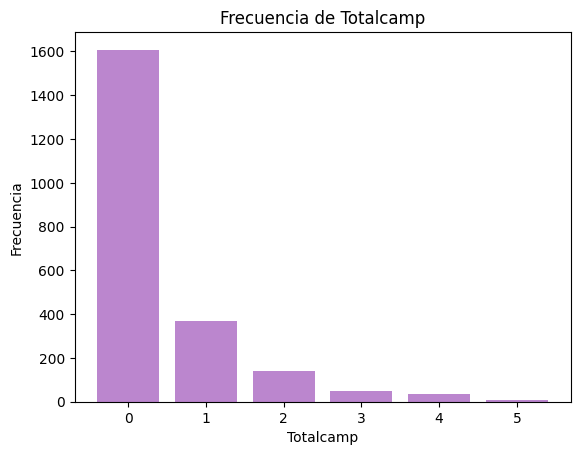

In [ ]:
tabla_frecuencia= datos["Totalcamp"].value_counts( )
plt.bar(x=tabla_frecuencia.index,height =tabla_frecuencia, color= "#BB86CE" )
plt.xlabel("Totalcamp") # Etiqueta del eje x
plt.ylabel("Frecuencia") # Etiqueta del eje y
plt.title("Frecuencia de Totalcamp") # Etiqueta del titulo
plt.show()

Luego de realizar la respectiva tabla de describe donde podemos observar diferentes valores estadisticos podemos concluir en la variable de edad se observa que la edad promedio es de 55 años pero con una distribucion bastante alta ya que las edades oscilan entre 28 a 84 años. En la variable de hijos se puede observar que la mayoria de las personas tiene un hijo o no tienen, en la variable de gastos totales tambien es una variable que varia considerablemente con un minimo de 5 y un maximo de 2525. En el total de campañas aceptadas muy pocas campañas fueron aceptadas dando un maximo de 5. En la variable ingresos esta tambien varia considerablemente ya que el minimo es de 1730 hasta un maximo de 162397 y por ultimo en la visitas al sitio web mensual este varia entre 0 a 20. Ahora en relacion con los graficos se analizo la variable ingreso con el total de campañas aceptadas y se puede observar que cualquier persona sea del ingreso que sea no aceptan campañas por lo que se puede decir que analizar estas dos variables no nos podria ayudar para ver que se podria realizar para que mas personas acepten campañas. Y por ultimo, como se observa en la tabla de frecuencia muchas personas no aceptan campañas en comparacion con los que aceptan campañas.

**Transformar los datos para realizar su estandarizacion**

In [ ]:
#TRANSFORMACIÓN DE VARIABLES CATEGORICAS A DUMMY
datos_numericos=pd.get_dummies(datos[Variables], columns=['Education'],dtype=int, drop_first=True )
datos_numericos

,Age,TotalChilds,TotalAmount,Totalcamp,Income,NumWebVisitsMonth,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,67,0,1617,1,58138.0,7,0,1,0,0
1,70,2,27,0,46344.0,5,0,1,0,0
2,59,0,776,0,71613.0,4,0,1,0,0
3,40,1,53,0,26646.0,6,0,1,0,0
4,43,1,422,0,58293.0,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2235,57,1,1341,0,61223.0,5,0,1,0,0
2236,78,3,444,1,64014.0,7,0,0,0,1
2237,43,0,1241,1,56981.0,6,0,1,0,0
2238,68,1,843,0,69245.0,3,0,0,1,0


In [ ]:
#ESTANDARIZAR LAS VARIABLES
scaler = StandardScaler()
scaled_features= scaler.fit_transform(datos_numericos)
scaled_features

array([[ 1.01835202, -1.26459792,  1.67624537, ...,  0.99189541,
        -0.44454219, -0.52643733],
       [ 1.27478522,  1.4045725 , -0.96329696, ...,  0.99189541,
        -0.44454219, -0.52643733],
       [ 0.33453017, -1.26459792,  0.28011009, ...,  0.99189541,
        -0.44454219, -0.52643733],
       ...,
       [-1.03311355, -1.26459792,  1.05205171, ...,  0.99189541,
        -0.44454219, -0.52643733],
       [ 1.10382975,  0.06998729,  0.39133608, ..., -1.00817081,
         2.24950527, -0.52643733],
       [ 1.27478522,  1.4045725 , -0.72258398, ..., -1.00817081,
        -0.44454219,  1.89956135]])

**IMPLEMENTACION K-MEANS**

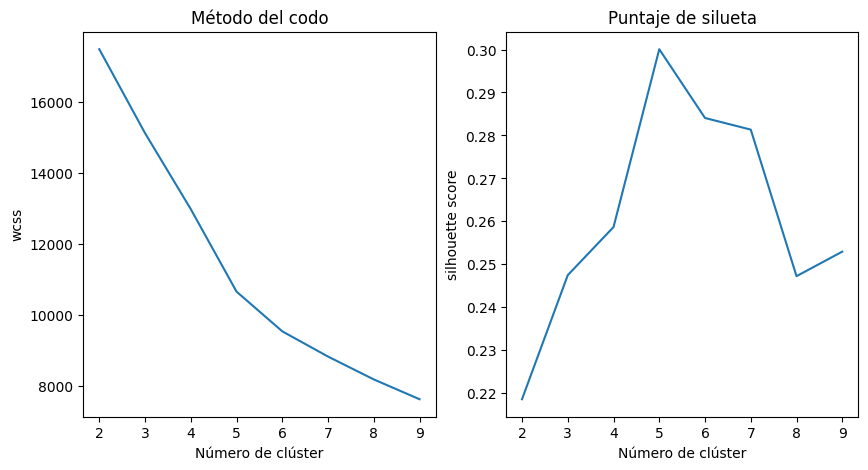

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[] #
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k)
  k_means.fit(scaled_features)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

Luego de implementar el modelo K-Means y de que nos arrojara el metodo del codo y el puntaje de silueta se tomo la decision que el numero correcto de clusters son 5 ya que teniendo en cuenta el metodo del codo despues del numero 5 no se observa un cambio considerable y ademas teniendo en cuenta el puntaje silueta donde se observa que el pico mas alto fue en el 5 lo que coincide con el metodo del codo por lo que se concluye que el numero correcto de clusters es 5.

In [ ]:
k_means=KMeans(5, random_state=123  )
k_means.fit(scaled_features )
datos["labels_k_means"]= k_means.labels_
datos["labels_k_means"] = datos["labels_k_means"].astype(str)
datos["labels_k_means"].value_counts()

,count
labels_k_means,
0,914
1,547
3,380
2,317
4,54


labels_k_means
0    0.413201
1    0.247288
3    0.171790
2    0.143309
4    0.024412
Name: proportion, dtype: float64


<Axes: xlabel='labels_k_means', ylabel='proportion'>

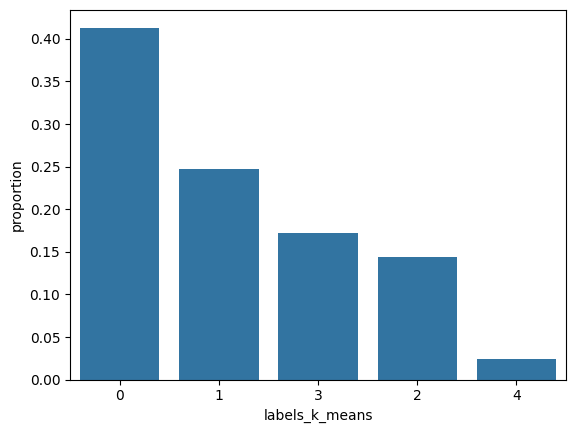

In [ ]:
print(datos["labels_k_means"].value_counts(normalize=True))
sns.barplot(datos["labels_k_means"].value_counts(normalize=True) )

In [ ]:
px.box(datos, x='labels_k_means', y='Age',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='EDAD: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_k_means', y='TotalChilds',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='TOTAL DE HIJOS: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_k_means', y='TotalAmount',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='TOTAL DE GASTO: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_k_means', y='Totalcamp',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='TOTAL DE CAMPAÑAS: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_k_means', y='Income',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='INGRESO: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_k_means', y='NumWebVisitsMonth',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='NÚMERO DE VISITAS AL SITIO WEB: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_k_means', y='Education',color="labels_k_means",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='EDUCACIÓN: Boxplot por clúster')

**Cluster 0**:Dentro de este cluster el cual pertenece el 41% de los consumidores luego de realizar los graficos para analizarlos con las variables de interes para la empresa se concluye que en la edad todos los clusters tienen mucha variabilidad, en total de hijos este cluster la media de hijos es 1 y tambien el maximo es 3 hijos, en el total de gastos la media de este cluster es 130 lo cual es uno de los mas bajos junto con el cluster 4, ademas en el total de campañas este cluster no tuvo variabilidad ya que la media fue 0 con un maximo de 3, en el tema de ingreso este cluster posee una media de 40.228 lo cual no es una mala media de ingreso, ahora con el numero de visitas al sitio web este cluster fue el que tuvo una mayor variabilidad y por educacion la media solo obtuvo Graduation.
**Cluster 1**: En este cluster pertenece alrededor del 24% de los consumidores, el cual luego de realizar los graficos correspondientes se pudo observar que este cluster la media de hijos es 0, ademas otro punto importante es que este cluster es el que mas gasta, agregando a lo anterior fue uno de los que mas acepto campañas, ademas es uno de los clusters que posee la media de ingreso mas alta que los demas pero es uno de los que menos visitas al sitio web realiza con una media de 2 y en educacion es uno de los que tuvo un poco mas de variabilidad con respecto a los demas.
**Cluster 2**: En este cluster pertenece un 17% de los consumidores, el cual luego de realizar los respectivos graficos se analizo las variables que le interesa a la empresa lo cual, podemos destacar que poseen una media de ingresos de 47.175, estos poseen una educacion de "Master", tienen buena variablidad de la variable de visitas la sitio web con una media de 6 veces, ademas es uno de los que no acepta campañas y que tiene una media de gasto de 275
**Cluster 3**: En este cluster pertenece un 14% de los consumidores, el cual luego de realizar los respectivos graficos se analizo las variables que le interesa a la empresa lo cual, este cluster es el segundo que posee un buen ingreso de media con un 49.908, ademas en el numero de visitas al sitio web tienen una buena variabilidad teniendo como media 6 veces, en educacion poseen un "PhD", este a pesar de que tiene un poco de variabilidad en la aceptacion de campañas la media de que estos acepten campañas es de 0.
**Cluster 4**: En este cluster pertenece un 2% de los consumidores, el cual luego de realizar los respectivos graficos se analizo las variables que le interesa a la empresa lo cual, este es el que menor media de edad tiene con 45 años, ademas este cluster es el que menos gasta con una media de 57, por otro lado este cluster tampoco aprovecha las campañas propuestas, ademas este es el que menos ingreso tiene con una media de 20.744, poseen una educacion de "Basic", en el numero de visitas al sitio web no posee mucha variabilidad pero tiene una media de entradas de 7.

**Implementacion del clustering jerarquico**

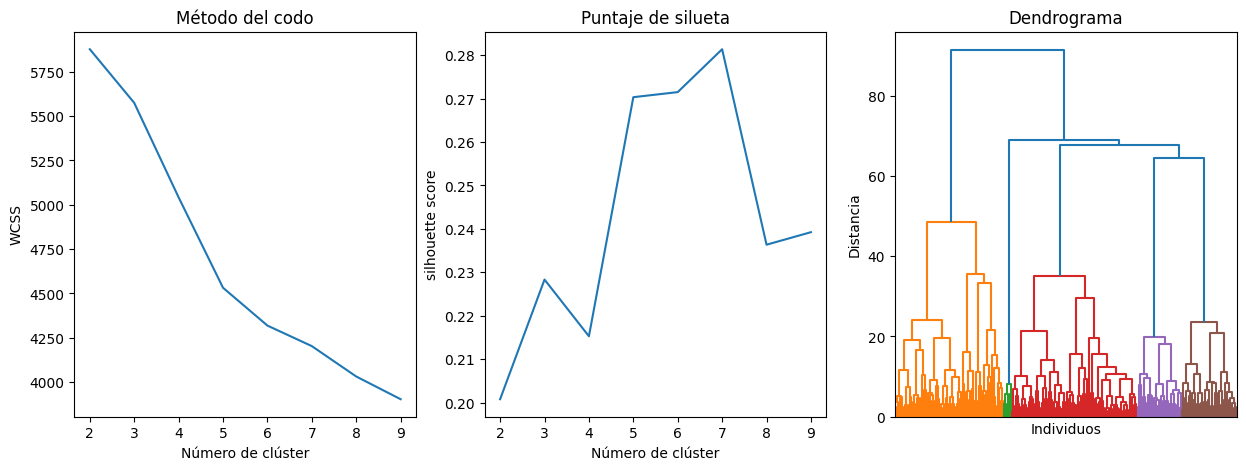

In [ ]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(scaled_features)
  scaled_temp= pd.DataFrame(scaled_features)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(scaled_features,centros  )  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(scaled_features,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[0].set_title("Método del codo")
axes[0].set_xlabel("Número de clúster" )
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")
axes[1].set_title("Puntaje de silueta")
axes[1].set_xlabel("Número de clúster" )

# visualización clustering jerarquico
dist_matrix = linkage(scaled_features, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

Luego de implementar el clustering jerarquico podemos concluir que el numero de clusters correcto es 5 ya que de acuerdo con el metodo del codo despues del 5 no se observa un cambio significativo, en el puntaje silueta donde se observo un pico mas pronunciado fue en el 5 y por ultimo en el dendograma despues de analizar donde seria correcto realizar el corte y teniendo en cuenta los dos metodos anteriores se observo que donde se podria agrupar bien los clusters es sacando 5 grupos.

In [ ]:
hc=AgglomerativeClustering(5 )
hc.fit(scaled_features )
datos["labels_hc"]= hc.labels_
datos["labels_hc"] = datos["labels_hc"].astype(str)
datos["labels_hc"].value_counts()

,count
labels_hc,
1,815
0,705
3,355
4,283
2,54


labels_hc
1    0.368445
0    0.318716
3    0.160488
4    0.127939
2    0.024412
Name: proportion, dtype: float64


<Axes: xlabel='labels_hc', ylabel='proportion'>

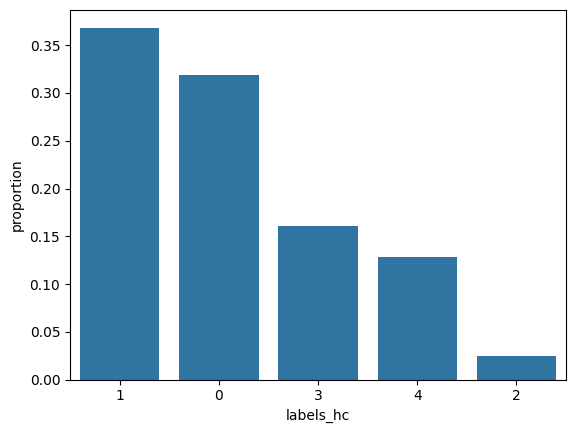

In [ ]:
print(datos["labels_hc"].value_counts(normalize=True))
sns.barplot(datos["labels_hc"].value_counts(normalize=True) )

In [ ]:
px.box(datos, x='labels_hc', y='Age',color="labels_hc",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='AGE: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_hc', y='TotalChilds',color="labels_hc",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='TOTAL DE HIJOS: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_hc', y='TotalAmount',color="labels_hc",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='TOTAL DE GASTO: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_hc', y='Totalcamp',color="labels_hc",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='TOTAL DE CAMPAÑAS: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_hc', y='Income',color="labels_hc",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='INGRESO: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_hc', y='NumWebVisitsMonth',color="labels_hc",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='NumWebVisitsMonth: Boxplot por clúster')

In [ ]:
px.box(datos, x='labels_hc', y='Education',color="labels_hc",
       points=False, # No muestra los puntos atípicos extendiendo las barras
             title='EDUCACIÓN: Boxplot por clúster')

**Cluster 0**: Este cluster pertenece un 32% de los consumidores, el cual luego de realizar el estudio de este cluster con las variables a analizar se concluye que estos poseen una media de 0 hijos, ademas es uno de los que mas gasta en comparacion con los demas cluster con una media de 1234, fue uno de los acepto un poco mas de campañas, es uno de los que mas ingresos de media tiene con 73.455, pero fue uno de los que menos visito el sitio web con una media de 3 y estos son los que poseen un poco de variabilidad en terminos de educacion.
**Cluster 1**: A este cluster pertenece el 36% de los consumidores, el cual luego de realizar el estudio de este cluster con las variables a analizar se concluye que es el segundo que menos gasta con una media de 94, no aceptan tantas campañas, poseen un ingreso de media de 37.758, es uno de los que mas variabilidad posee en el numero de visitas al sitio web y posee una media de 7 y en educacion la mayoria esta en "Graduation" pero tambien hay de "2n Cycle".
**Cluster 2**: Este cluster pertenece un 2% de los consumidores, el cual luego de realizar el estudio de este cluster con las variables a analizar se concluye que es el que menos gasto comparando los demas clusters con una media de 57, ademas es el que menos ingresos posee con una media de 20.744, a pesar que no posee tanta variabilidad como el cluster uno posee igual media de entradas al sitio web con 7 y poseen una educacion de "Basic".
**Cluster 3**: Este cluster pertenece un 16% de los consumidores, el cual luego de realizar el estudio de este cluster con las variables a analizar se concluye que poseen una media de gasto de 265, tampoco aceptan muchas campañas, es el segundo cluster que posee una buena media de ingresos con 48.918, poseen una media de entradas al sitio web de 6 y tienen una educacion de PhD.
**Cluster 4**: Este cluster pertenece un 13% de los consumidores, el cual luego de realizar el estudio de este cluster con las variables a analizar se concluye que poseen una media de gasto de 198, tambien no aceptan muchas campañas, poseen una media de ingresos de 45.006, tienen una media de entradas al sitio web de 6 y su educacion es "Master".

**Conclusion y Propuesta**

Despues de haber realizado ambos modelos se llega a la conclusion que ambos modelos se comportaron de la misma manera ya que se llego a la conclusion que ambos utilizaron el mismo numero de clusters ademas de que cuando se realizaron las graficas realizando la comparacion de los clusters con las variables de interes obtuvo casi un mismo resultado entre ambos por lo que ambos modelos se comportaron de manera similar.

Una propuesta es que teniendo en cuenta el cluster 1 (K-Means) y cluster 0 (CLuster Jerarquico) teniendo en cuenta que estos tuvieron similitudes se puede realizar una fidelizacion a estos ya que estos poseen un buen ingreso, tambien gastan, aceptan un poco mas las campañas pero no interactuan mucho en la pagina web lo que se pretende es que hagan mas campañas de promocion o atraccion a esta poblacion con el fin de que aumenten las ventas y logren captar a el mayor porcentaje de consumidores.